# Workplace

## Data Preprocessing

### Imputation below:

1. Filled all missing data of user-ages with `median` and user-country with `mode`.
2. Adjust age less than 10 and greater than 99.
    - Handled the data with semantic error

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

books_df = pd.read_csv('BX-Users.csv')

# Remove non-digit characters from 'User-Age' column
books_df['User-Age'] = books_df['User-Age'].str.replace(r'\D', '', regex=True)

# Convert 'User-Age' column to numeric
books_df['User-Age'] = pd.to_numeric(books_df['User-Age'], errors='coerce')

"""
# # Compute the median age
# median_age = books_df['User-Age'].median()
# print(median_age)

# # Replace NaN values with the median
# books_df['User-Age'] = books_df['User-Age'].fillna(median_age)

# # Adjusting ages greater than 99 and less than 10
# books_df.loc[books_df['User-Age'] > 210, 'User-Age'] = books_df['User-Age'] - 200
# books_df.loc[books_df['User-Age'] >= 200, 'User-Age'] = books_df['User-Age'] - 200 + 10
# books_df.loc[books_df['User-Age'] > 110, 'User-Age'] = books_df['User-Age'] - 100
# books_df.loc[books_df['User-Age'] >= 100, 'User-Age'] = books_df['User-Age'] - 100 + 10
# books_df.loc[books_df['User-Age'] < 10, 'User-Age'] = books_df['User-Age'] + 10
"""

# Count the rows where user age is null
count_null_age = books_df['User-Age'].isnull().sum()
# Count the rows where user age is less than 10 and greater than 99
count_extreme_ages = ((books_df['User-Age'] < 10) | (books_df['User-Age'] > 99)).sum()

# Total number of rows with errored age or null
error_age_count = count_null_age + count_extreme_ages

# Generate a list of random numbers between 10 and 99
random.seed(42)
random_ages = [random.randint(10, 99) for _ in range(error_age_count)]

# Create a mask for rows where user age is null or falls outside the range [10, 99]
error_age_rows = books_df['User-Age'].isnull() | (books_df['User-Age'] < 10) | (books_df['User-Age'] > 99)

# Extract the indexes of the rows that satisfy the condition
error_age_indexes = books_df.index[error_age_rows].tolist()

fill_age = {idx:ages for idx,ages in zip(error_age_indexes, random_ages)}

# Iterate over the fill_age dictionary and update the DataFrame
for idx, age in fill_age.items():
    books_df.loc[idx, 'User-Age'] = age



Make: 10.0 , Count: 196
Make: 11.0 , Count: 237
Make: 12.0 , Count: 222
Make: 13.0 , Count: 313
Make: 14.0 , Count: 437
Make: 15.0 , Count: 541
Make: 16.0 , Count: 594
Make: 17.0 , Count: 681
Make: 18.0 , Count: 763
Make: 19.0 , Count: 725
Make: 20.0 , Count: 733
Make: 21.0 , Count: 852
Make: 22.0 , Count: 871
Make: 23.0 , Count: 1020
Make: 24.0 , Count: 1022
Make: 25.0 , Count: 1160
Make: 26.0 , Count: 1147
Make: 27.0 , Count: 1083
Make: 28.0 , Count: 1128
Make: 29.0 , Count: 1196
Make: 30.0 , Count: 1091
Make: 31.0 , Count: 1057
Make: 32.0 , Count: 1096
Make: 33.0 , Count: 1103
Make: 34.0 , Count: 1129
Make: 35.0 , Count: 1080
Make: 36.0 , Count: 986
Make: 37.0 , Count: 895
Make: 38.0 , Count: 881
Make: 39.0 , Count: 785
Make: 40.0 , Count: 780
Make: 41.0 , Count: 791
Make: 42.0 , Count: 663
Make: 43.0 , Count: 757
Make: 44.0 , Count: 718
Make: 45.0 , Count: 716
Make: 46.0 , Count: 681
Make: 47.0 , Count: 676
Make: 48.0 , Count: 641
Make: 49.0 , Count: 656
Make: 50.0 , Count: 683
Mak

In [102]:
"""
# # Compute the mode country
# mode_country = books_df['User-Country'].mode()[0]

# # Replace NaN values with the mode
# books_df['User-Country'] = books_df['User-Country'].fillna(mode_country)
"""

# List all the countries in the data
country_list = list(books_df['User-Country'].dropna().unique())

# List row indexes where User-Country is null
nan_indexes = list(books_df['User-Country'][books_df['User-Country'].isnull()].index)

# Count total number of rows with null
count_nan = len(nan_indexes)

# Generate random countries for all null rows
random.seed(42)
random_countries = [random.choice(country_list) for _ in range(count_nan)]

fill_country = {idx:countries for idx,countries in zip(nan_indexes, random_countries)}

# Fill gaps in User-Country column
books_df['User-Country'] = books_df['User-Country'].fillna(fill_country)

Check the distribution of raw data, draft below

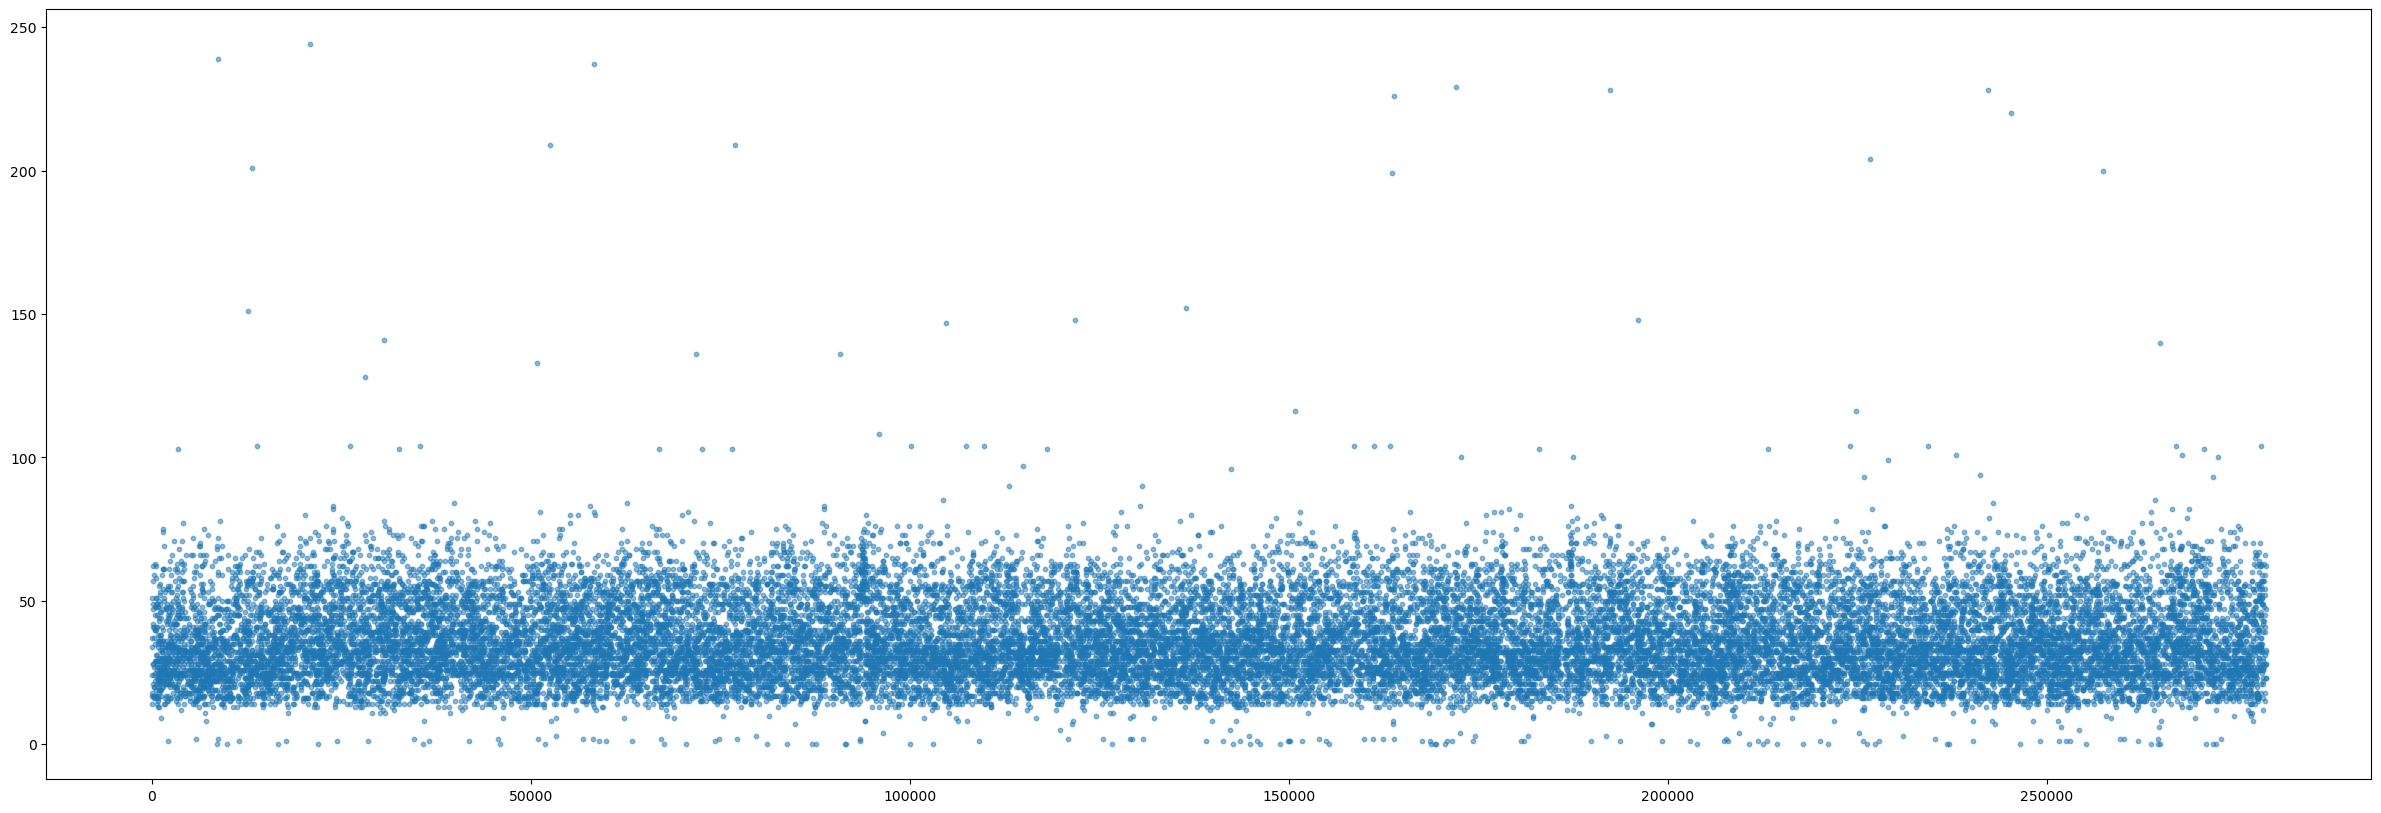

In [103]:
books_cp = pd.read_csv("BX-Users.csv")

# Remove non-digit characters from 'User-Age' column
books_cp["User-Age"] = books_cp["User-Age"].str.replace(r"\D", "", regex=True)

# Convert 'User-Age' column to numeric
books_cp["User-Age"] = pd.to_numeric(books_cp["User-Age"], errors="coerce")


plt.figure(figsize=(30, 10))
plt.scatter(x=books_cp["User-ID"] ,
            y=books_cp["User-Age"],
            s=10,
            alpha=0.5)
plt.show()